<a href="https://colab.research.google.com/github/thepacifistnietzsche/habitability-score/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
from google.colab import files
upload = files.upload()

Saving newdata.csv to newdata (2).csv


In [ ]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [ ]:
data = pd.read_csv("newdata (2).csv")
print(data.shape)
tdata = pd.read_csv("test.csv")
print(tdata.shape)

(33772, 16)
(10500, 14)


In [ ]:
tdata.shape

(10500, 14)

In [ ]:
data = data.dropna()



print(data)

      Property_ID       Property_Type  Property_Area  Number_of_Windows  \
0          0x8cb4  Single-family home           1229                  2   
1          0x9721            Bungalow           3780                  6   
2          0xa013           Apartment            445                  1   
3          0x5f41            Bungalow           3317                 10   
4          0x4bc2            Bungalow           4014                 12   
...           ...                 ...            ...                ...   
33767      0xbe4e  Single-family home           1185                  3   
33768      0x9409            Bungalow           2238                 14   
33769      0x7a57           Apartment            900                  3   
33770      0x7d81           Apartment            737                  4   
33771      0x68d4           Apartment            733                  2   

       Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
0                  

In [ ]:
total = tdata.isnull().sum().sort_values(ascending=False)
percent = (tdata.isnull().sum()/tdata.isnull().count()).sort_values(ascending=False)
missing_tdata = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
missing_tdata.head(11)

,Total,Percent
Number_of_Windows,445,0.042381
Frequency_of_Powercuts,366,0.034857
Dust_and_Noise,330,0.031429
Furnishing,257,0.024476
Crime_Rate,212,0.020190
Property_ID,0,0.000000
Property_Type,0,0.000000
Property_Area,0,0.000000
Number_of_Doors,0,0.000000
Power_Backup,0,0.000000


In [ ]:
#data['Number_of_Windows'] = data['Number_of_Windows'].fillna(data['Number_of_Windows'].median())
#data['Frequency_of_Powercuts']=data['Frequency_of_Powercuts'].fillna(data['Frequency_of_Powercuts'].median())
#data['Crime_Rate']=data['Crime_Rate'].fillna('Unspecified')
#data['Dust_and_Noise']=data['Dust_and_Noise'].fillna('Unspecified')
#data['Furnishing']=data['Furnishing'].fillna('NA')

In [ ]:
tdata['Number_of_Windows'] = tdata['Number_of_Windows'].fillna(tdata['Number_of_Windows'].median())
tdata['Frequency_of_Powercuts']=tdata['Frequency_of_Powercuts'].fillna(tdata['Frequency_of_Powercuts'].median())
tdata['Crime_Rate']=tdata['Crime_Rate'].fillna('Unspecified')
tdata['Dust_and_Noise']=tdata['Dust_and_Noise'].fillna('Unspecified')
tdata['Furnishing']=tdata['Furnishing'].fillna('NA')

In [ ]:
data['Crime_Rate_equivalent']= 1
for i in range (0,33772):
  
  if (data['Crime_Rate'][i]) == "Well above average":
   
    data['Crime_Rate_equivalent'][i]= 10
  if (data['Crime_Rate'][i]) == "Slightly above average":
    
    data['Crime_Rate_equivalent'][i]= 20
  if (data['Crime_Rate'][i]) == "Slightly below average":
    
    data['Crime_Rate_equivalent'][i]= 40
  if (data['Crime_Rate'][i]) == "Well below average":
    
    data['Crime_Rate_equivalent'][i]= 50
  #if (data['Crime_Rate'][i]) == "Unspecified":
    
   # (data['Crime_Rate_equivalent'][i])= 30


In [ ]:
tdata['Crime_Rate_equivalent']= 1
for i in range (0,10500):
  
  if (tdata['Crime_Rate'][i]) == "Well above average":
   
    tdata['Crime_Rate_equivalent'][i]= 10
  if (tdata['Crime_Rate'][i]) == "Slightly above average":
    
    tdata['Crime_Rate_equivalent'][i]= 20
  if (tdata['Crime_Rate'][i]) == "Slightly below average":
    
    tdata['Crime_Rate_equivalent'][i]= 40
  if (tdata['Crime_Rate'][i]) == "Well below average":
    
    tdata['Crime_Rate_equivalent'][i]= 50
  #if (data['Crime_Rate'][i]) == "Unspecified":
   #    (data['Crime_Rate_equivalent'][i])= 30

In [ ]:
data['Dust_and_Noise_equivalent']= 1
for i in range (0,33772):
  
  if (data['Dust_and_Noise'][i]) == "High":
   
    data['Dust_and_Noise_equivalent'][i]= 30
  if (data['Dust_and_Noise'][i]) == "Medium":
    
    data['Dust_and_Noise_equivalent'][i]= 20
  if (data['Dust_and_Noise'][i]) == "Low":
    
    data['Dust_and_Noise_equivalent'][i]= 10
  if (data['Dust_and_Noise'][i]) == "Unspecified":
    
    data['Dust_and_Noise_equivalent'][i]= 15



In [ ]:
tdata['Dust_and_Noise_equivalent']= 1
for i in range (0,10500):
  
  if (tdata['Dust_and_Noise'][i]) == "High":
   
    tdata['Dust_and_Noise_equivalent'][i]= 30
  if (tdata['Dust_and_Noise'][i]) == "Medium":
    
    tdata['Dust_and_Noise_equivalent'][i]= 20
  if (tdata['Dust_and_Noise'][i]) == "Low":
    
    tdata['Dust_and_Noise_equivalent'][i]= 10
  if (tdata['Dust_and_Noise'][i]) == "Unspecified":
    
    tdata['Dust_and_Noise_equivalent'][i]= 15

In [ ]:
data['Water_Supply_equivalent']= 1
for i in range (0,33772):
  
  if (data['Water_Supply'][i]) == "Once in two days":
   
    data['Water_Supply_equivalent'][i]= 3
  if (data['Water_Supply'][i]) == "NOT MENTIONED":
   
    data['Water_Supply_equivalent'][i]= 2
  if (data['Water_Supply'][i]) == "Once in a day - Morning":
    
    data['Water_Supply_equivalent'][i]= 2
  if (data['Water_Supply'][i]) == "Once in a day - Evening":
    
    data['Water_Supply_equivalent'][i]= 2
  if (data['Water_Supply'][i]) == "All time":
    
    data['Water_Supply_equivalent'][i]= 1


In [ ]:
tdata['Water_Supply_equivalent']= 1
for i in range (0,10500):
  
  if (tdata['Water_Supply'][i]) == "Once in two days":
   
    tdata['Water_Supply_equivalent'][i]= 3
  if (tdata['Water_Supply'][i]) == "NOT MENTIONED":
   
    tdata['Water_Supply_equivalent'][i]= 2
  if (tdata['Water_Supply'][i]) == "Once in a day - Morning":
    
    tdata['Water_Supply_equivalent'][i]= 2
  if (tdata['Water_Supply'][i]) == "Once in a day - Evening":
    
    tdata['Water_Supply_equivalent'][i]= 2
  if (tdata['Water_Supply'][i]) == "All time":
    
    tdata['Water_Supply_equivalent'][i]= 1

In [ ]:
  data['Furnishing_equivalent'] = 1
  for i in range (0,33772):
    
    
    if (data['Furnishing'][i]) == "Unfurnished":
    
      data['Furnishing_equivalent'][i]= 3
    if (data['Furnishing'][i]) == "NA":
      
      data['Furnishing_equivalent'][i]= 2.5
    if (data['Furnishing'][i]) == "Semi_Furnished":
      
      data['Furnishing_equivalent'][i]= 2
    if (data['Furnishing'][i]) == "Fully Furnished":
      
      data['Furnishing_equivalent'][i]= 1

In [ ]:
  tdata['Furnishing_equivalent'] = 1
  for i in range (0,10500):
    
    
    if (tdata['Furnishing'][i]) == "Unfurnished":
    
      tdata['Furnishing_equivalent'][i]= 3
    if (tdata['Furnishing'][i]) == "NA":
      
      tdata['Furnishing_equivalent'][i]= 2.5
    if (tdata['Furnishing'][i]) == "Semi_Furnished":
      
      tdata['Furnishing_equivalent'][i]= 2
    if (tdata['Furnishing'][i]) == "Fully Furnished":
      
      tdata['Furnishing_equivalent'][i]= 1

In [ ]:
data['Property_Type_equivalent']= 1
for i in range (0,33772):
  
  
  if (data['Property_Type'][i]) == "Bungalow":
   
    data['Property_Type_equivalent'][i]= 6
  if (data['Property_Type'][i]) == "Duplex":
    
    data['Property_Type_equivalent'][i]= 5
  if (data['Property_Type'][i]) == "#R%$G&867":
    
    data['Property_Type_equivalent'][i]= 3
  if (data['Property_Type'][i]) == "Single-family home":
    
    data['Property_Type_equivalent'][i]= 4
  if (data['Property_Type'][i]) == "Apartment":
    
    data['Property_Type_equivalent'][i]= 2
  if (data['Property_Type'][i]) == "Container Home":
    
    data['Property_Type_equivalent'][i]= 1

  

In [ ]:
tdata['Property_Type_equivalent']= 1
for i in range (0,10500):
  
  
  if (tdata['Property_Type'][i]) == "Bungalow":
   
    tdata['Property_Type_equivalent'][i]= 6
  if (tdata['Property_Type'][i]) == "Duplex":
    
    tdata['Property_Type_equivalent'][i]= 5
  if (tdata['Property_Type'][i]) == "#R%$G&867":
    
    tdata['Property_Type_equivalent'][i]= 3
  if (tdata['Property_Type'][i]) == "Single-family home":
    
    tdata['Property_Type_equivalent'][i]= 4
  if (tdata['Property_Type'][i]) == "Apartment":
    
    tdata['Property_Type_equivalent'][i]= 2
  if (tdata['Property_Type'][i]) == "Container Home":
    
    tdata['Property_Type_equivalent'][i]= 1

In [ ]:
data['Power_Backup_equivalent']= 1
for i in range (0,33772):
  
  
  if (data['Power_Backup'][i]) == "Yes":
   
    data['Power_Backup_equivalent'][i]= 1
  if (data['Power_Backup'][i]) == "No":
    
    data['Power_Backup_equivalent'][i]= 0
  if (data['Power_Backup'][i]) == "NOT MENTIONED":
    data['Power_Backup_equivalent'][i]= .5

In [ ]:
tdata['Power_Backup_equivalent']= 1
for i in range (0,10500):
  
  
  if (tdata['Power_Backup'][i]) == "Yes":
   
    tdata['Power_Backup_equivalent'][i]= 1
  if (tdata['Power_Backup'][i]) == "No":
    
    tdata['Power_Backup_equivalent'][i]= 0
  if (tdata['Power_Backup'][i]) == "NOT MENTIONED":
    tdata['Power_Backup_equivalent'][i]= .5

In [ ]:
data = data.drop(["Property_Type", "Furnishing","Water_Supply", "Dust_and_Noise","Crime_Rate", "Power_Backup", "Property_ID",],axis=1)
tdata = tdata.drop(["Property_Type", "Furnishing","Water_Supply", "Dust_and_Noise","Crime_Rate", "Power_Backup"],axis=1)



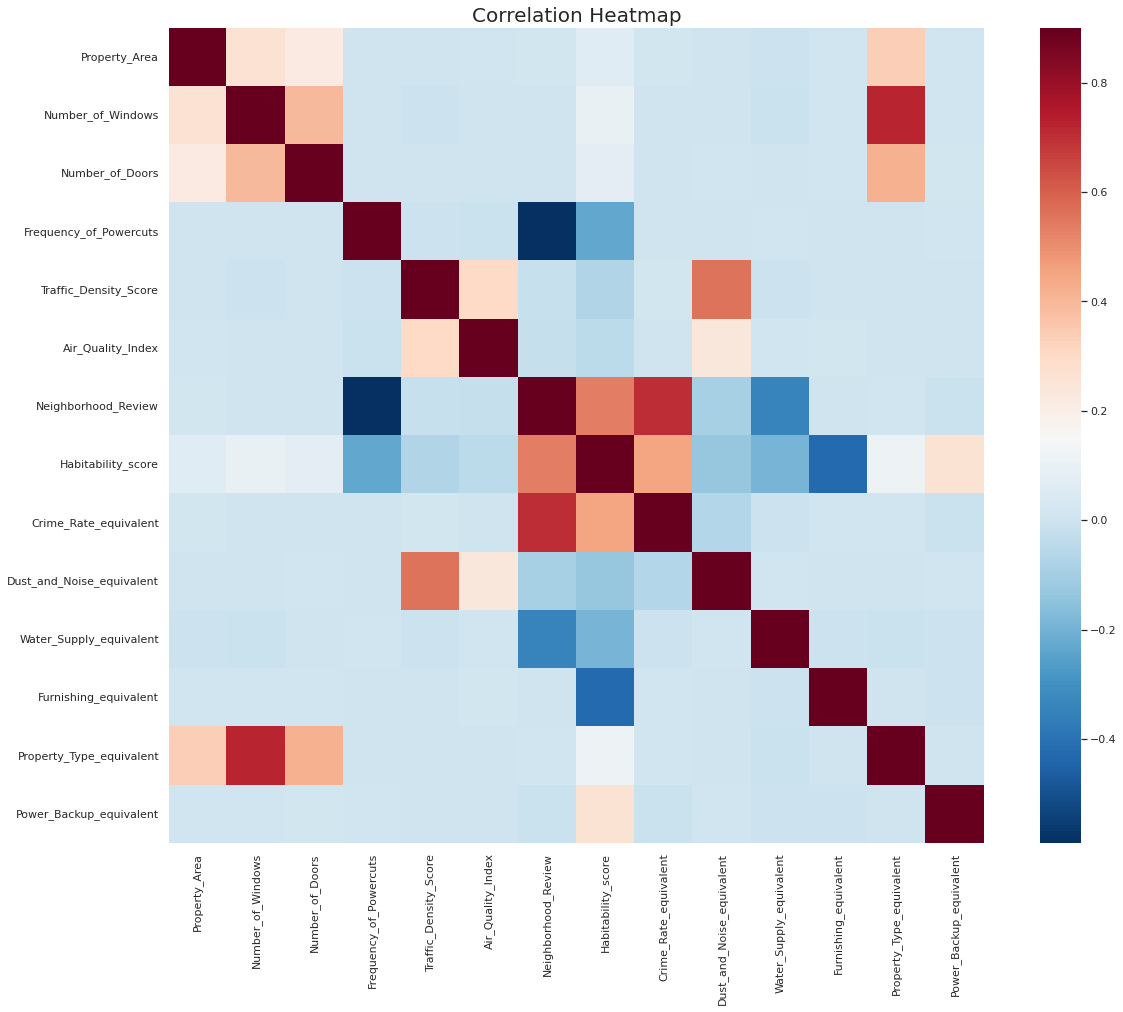

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20,15))
ax.set_title('Correlation Heatmap',fontsize=20)
sns.heatmap(corrmat, vmax=0.9,cmap="RdBu_r", square=True)
plt.show()

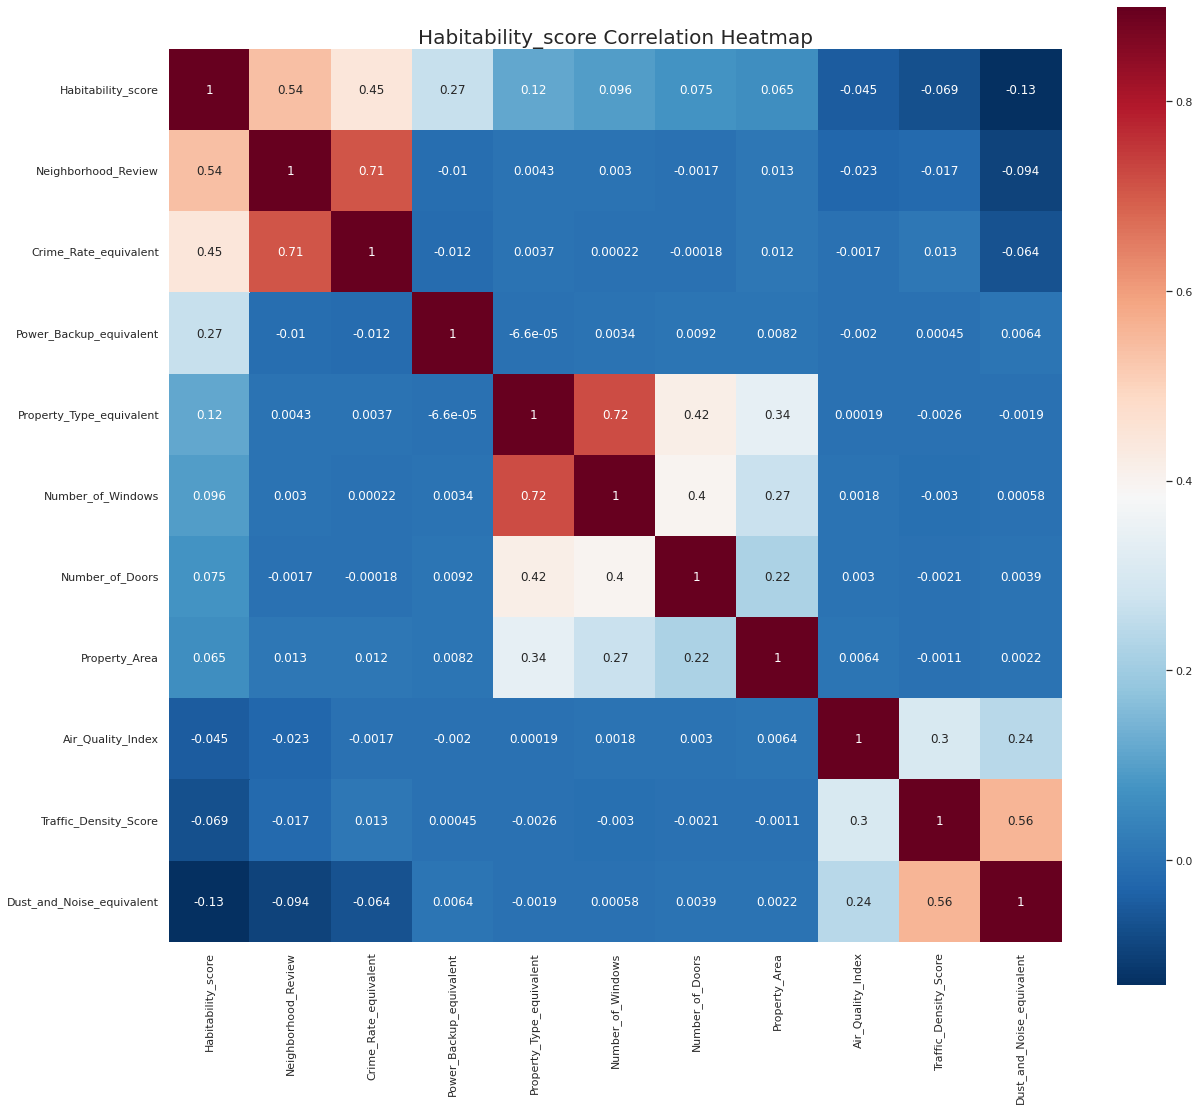

In [ ]:
k = 11
cols = corrmat.nlargest(k, 'Habitability_score')['Habitability_score'].index
corrmat2 = data[cols].corr()

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20,18))
ax.set_title('Habitability_score Correlation Heatmap',fontsize=20)
sns.heatmap(corrmat2,vmax=0.9, annot=True, cmap="RdBu_r", square=True)
plt.show()

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
missing_data.head(11)

,Total,Percent
Property_Area,0,0.0
Number_of_Windows,0,0.0
Number_of_Doors,0,0.0
Frequency_of_Powercuts,0,0.0
Traffic_Density_Score,0,0.0
Air_Quality_Index,0,0.0
Neighborhood_Review,0,0.0
Habitability_score,0,0.0
Crime_Rate_equivalent,0,0.0
Dust_and_Noise_equivalent,0,0.0


In [ ]:
total = tdata.isnull().sum().sort_values(ascending=False)
percent = (tdata.isnull().sum()/tdata.isnull().count()).sort_values(ascending=False)
missing_tdata = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
missing_tdata.head(11)

,Total,Percent
Property_ID,0,0.0
Property_Area,0,0.0
Number_of_Windows,0,0.0
Number_of_Doors,0,0.0
Frequency_of_Powercuts,0,0.0
Traffic_Density_Score,0,0.0
Air_Quality_Index,0,0.0
Neighborhood_Review,0,0.0
Crime_Rate_equivalent,0,0.0
Dust_and_Noise_equivalent,0,0.0


In [ ]:
data.to_csv("cleandata.csv")
data = pd.read_csv("cleandata.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33772 entries, 0 to 33771
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 33772 non-null  int64  
 1   Property_Area              33772 non-null  int64  
 2   Number_of_Windows          33772 non-null  int64  
 3   Number_of_Doors            33772 non-null  int64  
 4   Frequency_of_Powercuts     33772 non-null  int64  
 5   Traffic_Density_Score      33772 non-null  float64
 6   Air_Quality_Index          33772 non-null  int64  
 7   Neighborhood_Review        33772 non-null  float64
 8   Habitability_score         33772 non-null  float64
 9   Crime_Rate_equivalent      33772 non-null  int64  
 10  Dust_and_Noise_equivalent  33772 non-null  int64  
 11  Water_Supply_equivalent    33772 non-null  int64  
 12  Furnishing_equivalent      33772 non-null  int64  
 13  Property_Type_equivalent   33772 non-null  int

In [ ]:
tdata.to_csv("cleantdata.csv")
tdata = pd.read_csv("cleantdata.csv")
tdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10500 non-null  int64  
 1   Property_ID                10500 non-null  object 
 2   Property_Area              10500 non-null  int64  
 3   Number_of_Windows          10500 non-null  float64
 4   Number_of_Doors            10500 non-null  int64  
 5   Frequency_of_Powercuts     10500 non-null  float64
 6   Traffic_Density_Score      10500 non-null  float64
 7   Air_Quality_Index          10500 non-null  float64
 8   Neighborhood_Review        10500 non-null  float64
 9   Crime_Rate_equivalent      10500 non-null  int64  
 10  Dust_and_Noise_equivalent  10500 non-null  int64  
 11  Water_Supply_equivalent    10500 non-null  int64  
 12  Furnishing_equivalent      10500 non-null  int64  
 13  Property_Type_equivalent   10500 non-null  int

In [ ]:
data = data.drop([ 'Unnamed: 0' ],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33772 entries, 0 to 33771
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_Area              33772 non-null  int64  
 1   Number_of_Windows          33772 non-null  int64  
 2   Number_of_Doors            33772 non-null  int64  
 3   Frequency_of_Powercuts     33772 non-null  int64  
 4   Traffic_Density_Score      33772 non-null  float64
 5   Air_Quality_Index          33772 non-null  int64  
 6   Neighborhood_Review        33772 non-null  float64
 7   Habitability_score         33772 non-null  float64
 8   Crime_Rate_equivalent      33772 non-null  int64  
 9   Dust_and_Noise_equivalent  33772 non-null  int64  
 10  Water_Supply_equivalent    33772 non-null  int64  
 11  Furnishing_equivalent      33772 non-null  int64  
 12  Property_Type_equivalent   33772 non-null  int64  
 13  Power_Backup_equivalent    33772 non-null  int

In [ ]:
tdata = tdata.drop([ 'Unnamed: 0' ],axis=1)
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                10500 non-null  object 
 1   Property_Area              10500 non-null  int64  
 2   Number_of_Windows          10500 non-null  float64
 3   Number_of_Doors            10500 non-null  int64  
 4   Frequency_of_Powercuts     10500 non-null  float64
 5   Traffic_Density_Score      10500 non-null  float64
 6   Air_Quality_Index          10500 non-null  float64
 7   Neighborhood_Review        10500 non-null  float64
 8   Crime_Rate_equivalent      10500 non-null  int64  
 9   Dust_and_Noise_equivalent  10500 non-null  int64  
 10  Water_Supply_equivalent    10500 non-null  int64  
 11  Furnishing_equivalent      10500 non-null  int64  
 12  Property_Type_equivalent   10500 non-null  int64  
 13  Power_Backup_equivalent    10500 non-null  int

In [ ]:
test_data = data.sample(frac=0.05)
print(data.shape)
duplicates = set(data.index).intersection(test_data.index)
data = data.drop(duplicates, axis=0)
print(data.shape)

(33772, 14)
(32083, 14)


In [ ]:
test_data = test_data.drop(['Habitability_score'],axis=1)
print(test_data.shape)

(1689, 13)


In [ ]:
scores = data['Habitability_score']
features = data.drop('Habitability_score', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, scores, test_size=0.5, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR_regressor.score(X_train,y_train)

0.5758986858242683

In [ ]:
import statsmodels.api as sm
# append intercept to features
features = np.append(arr = np.ones((32083,1)).astype(int), values = features, axis=1)

features_opt = features[:,[0,1,2,3,4,5,6,7,8,9,10]]
regressor_OLS = sm.OLS(endog = scores, exog = features_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Habitability_score   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1492.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:37:47   Log-Likelihood:            -1.2424e+05
No. Observations:               32083   AIC:                         2.485e+05
Df Residuals:                   32072   BIC:                         2.486e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8359      1.504     28.484      0.000      39.888      45.784
x1             0.0002   3.47e-05      6.282      0.000       0.000       0.000
x2             0.3688      0.027     13.762      0.000       0.316       0.421
x3             0.4701      0.060      7.798      0.000       0.352       0.588
x4             0.6236      0.291      2.140      0.032       0.052       1.195
x5            -0.2323      0.066     -3.520      0.000      -0.362      -0.103
x6            -0.0023      0.001     -2.067      0.039      -0.004      -0.000
x7             8.0716      0.445     18.133      0.000       7.199       8.944
x8             0.1313      0.020      6.439      0.000       0.091       0.171
x9            -0.2496      0.022    -11.465      0.000      -0.292      -0.207
x10           -0.7045      0.231     -3.043      0.002      -1.158      -0.251
==============================================================================
Omnibus:                     2527.318   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3460.774
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                       3.890   Cond. No.                     5.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [ ]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [ ]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
decisiontree_regressor = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(decisiontree_regressor.get_params()['max_depth']))

Parameter 'max_depth' is 9 for the optimal model.


In [ ]:
dt_predicted_score = decisiontree_regressor.predict(X_test)
decisiontree_r2 = performance_metric(y_test, dt_predicted_score)
print ("Optimal model has R^2 score {:,.2f} on test data".format(decisiontree_r2))

Optimal model has R^2 score 0.78 on test data


In [ ]:
dt_predicted_score = decisiontree_regressor.predict(tdata.drop([ 'Property_ID' ],axis=1))
tdata["Habitability_score"] = dt_predicted_score


#decisiontree_r2 = performance_metric(y_test, dt_predicted_score)
#print ("Optimal model has R^2 score {:,.2f} on test data".format(decisiontree_r2))

In [ ]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                10500 non-null  object 
 1   Property_Area              10500 non-null  int64  
 2   Number_of_Windows          10500 non-null  float64
 3   Number_of_Doors            10500 non-null  int64  
 4   Frequency_of_Powercuts     10500 non-null  float64
 5   Traffic_Density_Score      10500 non-null  float64
 6   Air_Quality_Index          10500 non-null  float64
 7   Neighborhood_Review        10500 non-null  float64
 8   Crime_Rate_equivalent      10500 non-null  int64  
 9   Dust_and_Noise_equivalent  10500 non-null  int64  
 10  Water_Supply_equivalent    10500 non-null  int64  
 11  Furnishing_equivalent      10500 non-null  int64  
 12  Property_Type_equivalent   10500 non-null  int64  
 13  Power_Backup_equivalent    10500 non-null  int

In [ ]:
submission = tdata[["Property_ID", "Habitability_score"]]
submission.to_csv("predictions.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [ ]:
# Fit the training data to the model using grid search
randomforest_regressor = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(randomforest_regressor.get_params()['max_depth']))

Parameter 'max_depth' is 9 for the optimal model.


In [ ]:
model=RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,random_state=1)
model.fit(X_train,y_train)
rf_predicted_score = model.predict(X_test)

randomforest_r2 = performance_metric(y_test, np.around(rf_predicted_score,2))
print ("Optimal model has R^2 score {:,.2f} on test data".format(randomforest_r2))

Optimal model has R^2 score 0.83 on test data


In [ ]:
sdata=tdata.drop([ 'Habitability_score','Property_ID' ],axis=1)

In [ ]:
model=RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,random_state=1)
model.fit(X_train,y_train)
rf_predicted_score = model.predict(sdata)

#randomforest_r2 = performance_metric(sdata, np.around(rf_predicted_score,2))
#print ("Optimal model has R^2 score {:,.2f} on test data".format(randomforest_r2))

In [ ]:
submission = tdata[["Property_ID"]]
submission["Habitability_score"] = dt_predicted_score




In [ ]:
submission.head()

,Property_ID,Habitability_score
0,0x6e93,27.971429
1,0x8787,81.235439
2,0x6c17,67.130820
3,0x9dbd,71.379565
4,0xbfde,74.302593


In [ ]:
submission.to_csv("prediction2.csv", index = False)

In [ ]:
answerdata = pd.read_csv("prediction2.csv")
print(answerdata.shape)

(10500, 2)


In [ ]:
answerdata.columns

Index(['Property_ID', 'Habitability_score'], dtype='object')

In [ ]:
solution= answerdata.head()
solution.to_csv("finalsolution.csv")


In [ ]:




pdata.to_csv("finalsolution.csv",index=False)
pdata.shape

(5, 2)

In [ ]:
y_test.head(5)

33263    59.74
27523    59.41
9287     87.22
14862    70.92
6348     58.37
Name: Habitability_score, dtype: float64